<a href="https://colab.research.google.com/github/IshanBhattOfficial/Lane-Annotation-for-Self-Driving-Car/blob/master/LaneAnnotation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

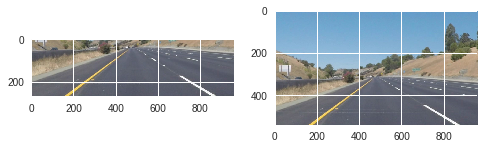

In [1]:
## Use this cell to fetch the image if you are not ishan bhatt using image's live URL
from PIL import Image
import requests
from io import BytesIO
import cv2
import matplotlib.pyplot as plt
import numpy as np

url = "https://guydavis.github.io/img/posts/lane_detect_source.jpg"
response = requests.get(url)
img = Image.open(BytesIO(response.content))
img = np.array(img)
x, y, z = img.shape

### WE CUT THE UPPER PART OF IMAGE = SKY
plt.subplot(1,2,1)
plt.imshow(img[int(x/2):,:])
plt.subplot(1,2,2)
plt.imshow(img)

plt.imsave("TheImage.png", img)
plt.imsave("TheImageHalf.png", img[int(x/2):,:])

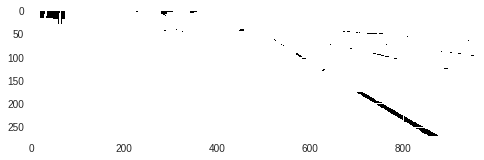

In [2]:
##LET US DETECT WHITE REGIONS FIRST

img = cv2.imread("TheImageHalf.png")
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
ret, whiter = cv2.threshold(gray, 195, 260, cv2.THRESH_BINARY)
cv2.THRESH_MASK
plt.imshow(whiter)

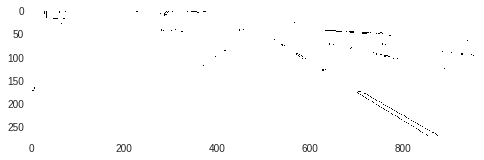

In [3]:
##EDGES TO WHITE PATCHES

edges = cv2.Canny(whiter, 50, 150, 7)
plt.imshow(edges)


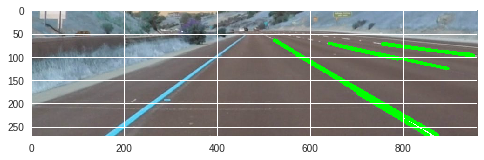

In [4]:
##LET US PLOT WHITE LANES 

img = cv2.imread("TheImageHalf.png")
lines = cv2.HoughLinesP(image=edges,rho=1,theta=np.pi/180, threshold=10,
                        lines=np.array([]), minLineLength = 25, maxLineGap=200)

for line in lines:
  x1,y1,x2,y2 = line[0]
  if abs((y1 - y2)/(x2-x1)) > 0.1:
    cv2.line(img, (x1,y1  ), (x2,y2 ), (0,255,0), thickness=5)

plt.imshow(img)


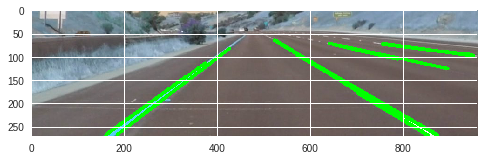

In [5]:
##NOW WE DO THE SAME PROCEDURE FOR YELLOW LANES 

frame = cv2.GaussianBlur(img, (5, 5), 0)
hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
low_yellow = np.array([18, 94, 140])
up_yellow = np.array([48, 255, 255])
mask = cv2.inRange(hsv, low_yellow, up_yellow)
edges = cv2.Canny(mask, 75, 150)
 
yellow_lines = cv2.HoughLinesP(edges, 1, np.pi/180, 50, maxLineGap=50)
#print(yellow_lines)
for line in yellow_lines:
  x1,y1,x2,y2 = line[0]
  cv2.line(img, (x1,y1  ), (x2,y2 ), (0,255,0), thickness=5)

plt.imshow(img)



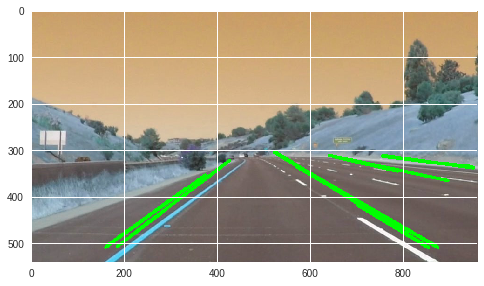

In [6]:
##STICKING UPPER IMAGE (THERE IS SOME LOSS DUE TO implicit conversion between png and jpg)

img_full = cv2.imread("TheImage.png")

for line in lines:
  x1,y1,x2,y2 = line[0]
  if abs((y1 - y2)/(x2-x1)) > 0.1:
    cv2.line(img_full, (x1,y1 + int(y/4) ), (x2,y2 + int(y/4)), (0,255,0), thickness=5)

for line in yellow_lines:
  x1,y1,x2,y2 = line[0]
  cv2.line(img_full, (x1,y1 + int(y/4) ), (x2,y2 + int(y/4)), (0,255,0), thickness=5)

plt.imshow(img_full)
  
  